In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv(r'C:\Users\LPT-3036\Assignment\Class\Reviews.csv')

In [5]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
data.shape

(568454, 10)

In [7]:
data.columns

# Attribute Information
# Id - Row Id
# ProductId - Unique identifier for the product
# UserId - Unqiue identifier for the user
# ProfileName - Profile name of the user
# HelpfulnessNumerator - Number of users who found the review helpful
# HelpfulnessDenominator - Number of users who indicated whether they found the review helpful or not
# Score - Rating between 1 and 5
# Time - Timestamp for the review
# Summary - Brief summary of the review
# Text - Text of the review

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
 10  Text_rmv_stpwrd         568454 non-null  object
 11  Text_v2                 568454 non-null  object
dtypes: int64(5), object(7)
memory usage: 52.0+ MB


In [46]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [8]:
with pd.option_context('display.max_colwidth', -1,'display.max_columns',7,'display.max_rows',5):
    display(data.head(16))

,Id,ProductId,UserId,...,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,...,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,2,B00813GRG4,A1D87F6ZCVE5NK,...,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
...,...,...,...,...,...,...,...
14,15,B001GVISJM,A2MUGFV2TDQ47K,...,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasure - yummy. Six pounds will be around for a while with my son and I.
15,16,B001GVISJM,A1CZX3CP8IKQIJ,...,1262044800,"Lots of twizzlers, just what you expect.",My daughter loves twizzlers and this shipment of six pounds really hit the spot. It's exactly what you would expect...six packages of strawberry twizzlers.


In [9]:
data['ProductId'].value_counts() # Length: 74258 - So distinct Product ID reviews we have are 74258

B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
             ... 
B004DSPTTM      1
B008C9QWU8      1
B007O5A6BM      1
B003Q4TZ08      1
B001LR2CU2      1
Name: ProductId, Length: 74258, dtype: int64

In [10]:
len(data.ProductId.unique())

74258

In [11]:
data['ProfileName'].nunique()

218416

In [12]:
data['UserId'].value_counts()  # 256059 - So 256059 distinct users have given feedback on 74258 products.

A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
                 ... 
A2O8OFVSTO9PF3      1
A1C6KXG47GAQ7B      1
A1TU5DS89D9OVD      1
A3N005JS5FG5FI      1
A3LGQPJCZVL9UC      1
Name: UserId, Length: 256059, dtype: int64

In [13]:
data['UserId'].value_counts()>50

A3OXHLG6DIBRW8     True
A1YUL9PCJR3JTY     True
AY12DBB0U420B      True
A281NPSIMI1C2R     True
A1Z54EM24Y40LL     True
                  ...  
A2O8OFVSTO9PF3    False
A1C6KXG47GAQ7B    False
A1TU5DS89D9OVD    False
A3N005JS5FG5FI    False
A3LGQPJCZVL9UC    False
Name: UserId, Length: 256059, dtype: bool

In [14]:
arr=data['UserId'].value_counts()>50
count=0
for a in arr:
    if(a==True):
        count+=1
count

260

# Datapoints with Missing/Null Features

In [15]:
data.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [16]:
# Observations:
# There are 16 datapoints having 'ProfileName' as Null.
# There are 27 datapoints having 'Summary' as Null.
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

## Peak the datapoints having 'ProfileName' Feature as Null

In [28]:
with pd.option_context('display.max_colwidth',1):
    display(data[data['ProfileName'].isnullll()])

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_rmv_stpwrd,Text_v2
25509,25510,B000LKZB4Y,A36BVYD0NT7Z0F,NaN,0,0,5,1314576000,These are the best mints and no aspartame or BHT,I was so shocked to find out that almost all gums have BHT. I went to the health food store and got gum with Xylitol but I didn't like the taste. B Fresh was the only one with Xylitol that didn't taste like aspartame. I saw Newmans Own Organic Mints and was happy to see no aspartame or BHT and they are really good. I hope the company starts making gum. The only problem is the mints are made in Mexico. What is the matter Americans can't make mints?,shocked find almost gums bht went health food store got gum xylitol didnt like taste b fresh one xylitol didnt taste like aspartame saw newmans organic mints happy see aspartame bht really good hope company starts making gum problem mints made mexico matter americans cant make mints,shocked find almost gums bht went health food store got gum xylitol didnt like taste b fresh one xylitol didnt taste like aspartame saw newmans organic mints happy see aspartame bht really good hope company starts making gum problem mints made mexico matter americans cant make mints
38874,38875,B000AYDGZ2,A36BVYD0NT7Z0F,NaN,2,3,1,1278374400,doesn't anyone care that they are putting BHT into their bodies?,I called Kellogg's to see why Special K red berries has the natural preservative but Special K blueberry has the killer BHT. The women who answered wasn't helpful and didn't know why. She also seemed annoyed with my question. I won't even give my dog food with BHT why would I feed my family a cereal with BHT. Why don't these company use the more natural and safer preservative like tocoperol etc?,called kelloggs see special k red berries natural preservative special k blueberry killer bht women answered wasnt helpful didnt know also seemed annoyed question wont even give dog food bht would feed family cereal bht dont company use natural safer preservative like tocoperol etc,called kelloggs see special k red berries natural preservative special k blueberry killer bht women answered wasnt helpful didnt know also seemed annoyed question wont even give dog food bht would feed family cereal bht dont company use natural safer preservative like tocoperol etc
49800,49801,B000CRHQN0,A2LYFY32LXQDON,NaN,0,0,2,1282608000,They were melted and the chocolate had turned white,"We love these bars but i won't order them shipped from anywhere anymore. They came melted, white, and didn't taste as good as they do when they are fresh.",love bars wont order shipped anywhere anymore came melted white didnt taste good fresh,love bars wont order shipped anywhere anymore came melted white didnt taste good fresh
67077,67078,B0006348H2,A2P0P67Y55SNOX,NaN,1,1,5,1314662400,Wheatgrass,"Kitty seems to like this sprinkled on her food...Glad I bought 2, because I forgot to water one for a few days... Brown grass doesn't work...",kitty seems like sprinkled foodglad bought forgot water one days brown grass doesnt work,kitty seems like sprinkled foodglad bought forgot water one days brown grass doesnt work
106550,106551,B001EQ5DG0,A1P500QXEG3IUZ,NaN,0,0,5,1326758400,Finally!,"You cannot find this in the stores anymore, it's impossible to find. The price sometimes can be ridiculous ranging up above $40 (REALLY!). I orderd this on the subscribe and save under $18, but if the price increased, will discountinue it.",cannot find stores anymore impossible find price sometimes ridiculous ranging really orderd subscribe save price increased discountinue,cannot find stores anymore impossible find price sometimes ridiculous ranging really orderd subscribe save price increased discountinue
137613,137614,B000CQE3HS,AGT3BYX5P9SLH,NaN,0,0,5,1324684800,awesome,i love them they are amazing I would eat them everyday if i could afford to!my kids also love them,love amazing would eat everyday could afford tomy kids also love,love ama

## Peak the datapoints having 'Summary' Feature as Null

In [30]:
with pd.option_context('display.max_colwidth',1,'display.max_rows',25):
    display(data[data['Summary'].isnull()])

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_rmv_stpwrd,Text_v2
33958,33959,B00412W76S,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,"I only used two maybe three tea bags and got pregnant - can not drink during pregnancy. Not a bad taste, but I'm not a big tea fan either.",used two maybe three tea bags got pregnant drink pregnancy bad taste im big tea fan either,used two maybe three tea bags got pregnant drink pregnancy bad taste im big tea fan either
40548,40549,B00020HHRW,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,"I only used two maybe three tea bags and got pregnant - can not drink during pregnancy. Not a bad taste, but I'm not a big tea fan either.",used two maybe three tea bags got pregnant drink pregnancy bad taste im big tea fan either,used two maybe three tea bags got pregnant drink pregnancy bad taste im big tea fan either
101106,101107,B0014B0HWK,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,"I only used two maybe three tea bags and got pregnant - can not drink during pregnancy. Not a bad taste, but I'm not a big tea fan either.",used two maybe three tea bags got pregnant drink pregnancy bad taste im big tea fan either,used two maybe three tea bags got pregnant drink pregnancy bad taste im big tea fan either
102979,102980,B000FVDWU4,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,"I only used two maybe three tea bags and got pregnant - can not drink during pregnancy. Not a bad taste, but I'm not a big tea fan either.",used two maybe three tea bags got pregnant drink pregnancy bad taste im big tea fan either,used two maybe three tea bags got pregnant drink pregnancy bad taste im big tea fan either
117515,117516,B0016B7Z32,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,"I only used two maybe three tea bags and got pregnant - can not drink during pregnancy. Not a bad taste, but I'm not a big tea fan either.",used two maybe three tea bags got pregnant drink pregnancy bad taste im big tea fan either,used two maybe three tea bags got pregnant drink pregnancy bad taste im big tea fan either
...,...,...,...,...,...,...,...,...,...,...,...,...
392529,392530,B001H9XOEW,A22R17YPXEULEZ,Liz Wong,0,0,3,1334534400,NaN,"I like the product and tried it before I puchased it. However, one of the boxes arrived have only 10 in it instead of 12.",like product tried puchased however one boxes arrived instead,like product tried puchased however one boxes arrived instead
484367,484368,B00020HHGS,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,"I only used two maybe three tea bags and got pregnant - can not drink during pregnancy. Not a bad taste, but I'm not a big tea fan either.",used two maybe three tea bags got pregnant drink pregnancy bad taste im big tea fan either,used two maybe three tea bags got pregnant drink pregnancy bad taste im big tea fan either
486640,486641,B0014AUJII,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,"I only used two maybe three tea bags and got pregnant - can not drink during pregnancy. Not a bad taste, but I'm not a big tea fan either.",used two maybe three tea bags got pregnant drink pregnancy bad taste im big tea fan either,used two maybe three tea bags got pregnant drink pregnancy bad taste im big tea fan either
503260,503261,B00020HHE0,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,"I only used two maybe three tea bags and got pregnant - can not drink during pregnancy. Not a bad taste, but I'm not a big tea fan either.",used two maybe three tea bags got pregnant drink pregnancy bad taste im big tea fan either,used two maybe three tea bags got pregnant drink pregnancy bad taste im big tea fan either


### Observation
* The sample reviews above dont have a summary/title. But nothing to be concerned about since the 'text' corresponding to it is present, which may provide much more info about the review context/message.
* On a closer look, their text(review) attribute are all duplicated.  
* Everything except the 'ProductId' are same; Even TIME!
* So, we may safely presume that when a product has different variants(stock-keeping unit (SKU)), review written for any one of the variant gets replicated for all the other variants. And Each Product-Variant Combo gets assigned a different ProductId.
* We may delete the duplicated data in further steps

## Distribution of Ratings(Scores) across the entire dataset

In [44]:
data['Score'].value_counts().sort_values()

2     29769
3     42640
1     52268
4     80655
5    363122
Name: Score, dtype: int64

Text(0, 0.5, 'Number of ratings')

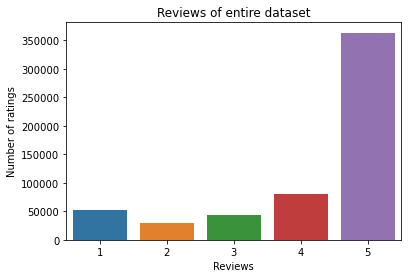

In [50]:
sns.countplot(x=data['Score'],)
plt.title('Reviews of entire dataset')
plt.xlabel('Reviews')
plt.ylabel('Number of ratings')